In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("housepricedata.csv")
# df.head(7)
dataset = df.values
X = dataset[:,:10]
Y = dataset[:,10]
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size= 0.5)
class neural_network:
    def __init__(self,X_va, X_tra,Y_va,Y_tra,lay,uni,act,bat_siz,epo,learn_rate):
        self.network = Sequential()
        self.network.add(Dense(units=uni, activation=act, input_dim = 10))
        for i in range(lay):
            self.network.add(Dense(units=uni, activation=act))
        self.network.add(Dense(units=1, activation='sigmoid'))
        SD = tf.keras.optimizers.SGD(learning_rate=learn_rate)
        self.network.compile(optimizer=SD, loss='binary_crossentropy', metrics=['accuracy'])
        self.histo = self.network.fit(X_tra, Y_tra, batch_size=bat_siz, epochs=epo,validation_data =(X_va, Y_va))

2022-11-13 14:33:04.967125: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Epoch 1/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7033 - accuracy: 0.4963 - val_loss: 0.6940 - val_accuracy: 0.5685
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4931 - val_loss: 0.6925 - val_accuracy: 0.5548
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5484 - val_loss: 0.6908 - val_accuracy: 0.6027
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5790 - val_loss: 0.6892 - val_accuracy: 0.6164
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6522 - val_loss: 0.6878 - val_accuracy: 0.6507
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6614 - val_loss: 0.6860 - val_accuracy: 0.6438
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6749 - val_loss: 0.6845 - val_accuracy: 0.6164
Epoch 8/100
2

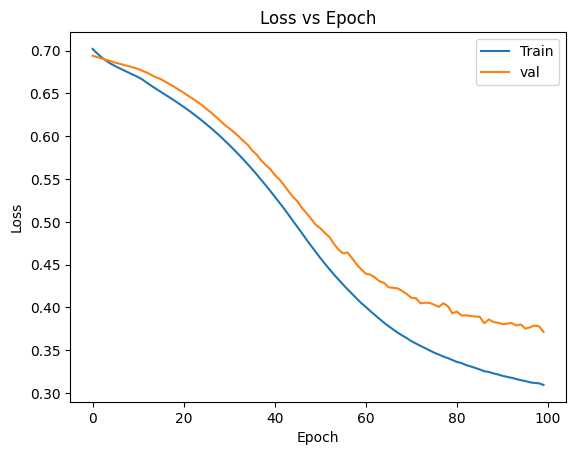

In [4]:
networ = neural_network(X_val,X_train,Y_val,Y_train,1,32,'relu',50,100,0.01)
# print("sdhsbdjkan")
networ.network.evaluate(X_test,Y_test)[1]
prediction = networ.network.predict(X_test)
prediction = [1 if y>=0.87 else 0 for y in prediction]
# prediction
plt.plot(networ.histo.history['loss'])
plt.plot(networ.histo.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","val"], loc = "upper right")
plt.show()